# base change demo: Lagrange $\leftrightarrow$ Legendre

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import fixed_quad
import operator
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, sys 
sys.path.insert(0,os.path.pardir)
from Bayes_util.lib.interpolation_util import (get_cheb_points, evaluate_lagrange, interpolate_lagrange, get_legendre_basis,
                                lagrange_to_legendre, evaluate_function_representation)

Consider Cebyshev points for Lagrange interpolation on $[-1,1]$.
Define some test functions $f_0,\ldots,$ to interpolate.

In [3]:
f0 = lambda x: np.polyval([3,2,1], x)
f1 = lambda x: np.polyval([2,4,3,2,1], x)
f2 = lambda x: np.polyval([2,4,3,2,1], x) + np.sin(5*np.pi*np.array(x))
f_small = lambda x: np.array(x)*-3

In [16]:
cheb_dim = [5]
cheb_points = get_cheb_points(cheb_dim)[0]
cheb_points_small = get_cheb_points([3])[0]
print cheb_points

[0.95105651629515353, 0.58778525229247314, 6.123233995736766e-17, -0.58778525229247303, -0.95105651629515353]


Plot Lagrange basis for Chebyshev points.

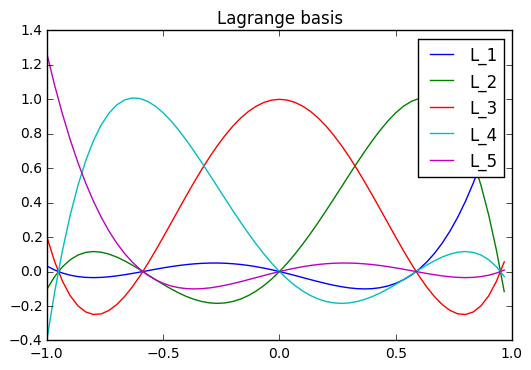

In [6]:
x = np.arange(-1, 1, 1/30)
y = [evaluate_lagrange(x, cheb_points, j) for j in range(len(cheb_points))]
#poly_value = [evaluate_lagrange(cheb_points, cheb_points, j) for j in range(len(cheb_points))]
#print poly_value[:][]
lia = 0
for yi in y:
    lia += 1
    plt.plot(x, yi, label="L_{}".format(lia))
plt.title('Lagrange basis')
plt.legend()

Evaluate and plot Lagrange interpolation of test functions.

In [7]:
def plot_lagrange_interpolation(f, nodes, res=100):
    x = np.arange(-1, 1, 1/res)
    y = map(f, x)
    Iy, samples = interpolate_lagrange(x, f, nodes)
    plt.plot(x, y, label='f')
    plt.plot(x, Iy, label='If')
    plt.plot(x, y-Iy, label='err')
    plt.plot(nodes, samples, 'ro')
    plt.legend(ncol=3, loc=2)
    plt.show()

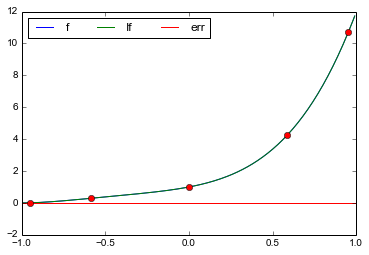

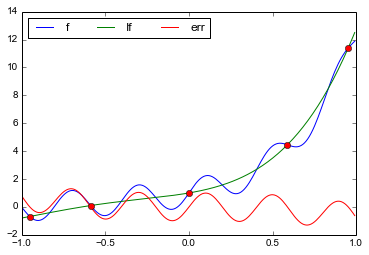

In [10]:
plot_lagrange_interpolation(f1, cheb_points)
plot_lagrange_interpolation(f2, cheb_points)

Plot Legendre basis.

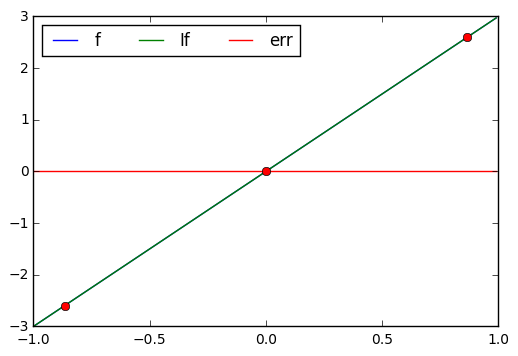

In [9]:
plot_lagrange_interpolation(f_small, cheb_points_small)

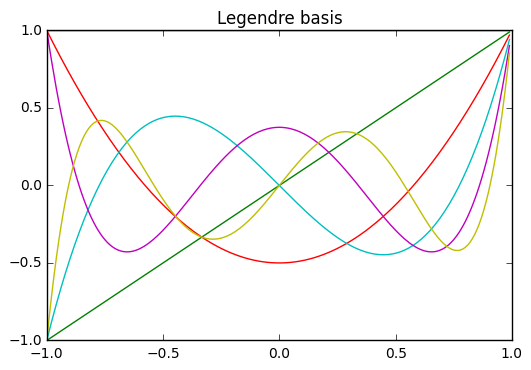

In [11]:
# get Legendre polynomials L and respective norms N for normalisation
degree = 6
L, N, _ = get_legendre_basis(degree)
x = np.arange(-1, 1, 1/100)
y = [map(l, x) for l in L]
for lia in range(len(y)):
    #plt.plot(x, y[lia]/N[lia])
    plt.plot(x, y[lia])
plt.title('Legendre basis')

Verify orthonormality of Legendre basis. Note that Legendre functions have to be normalised.

In [23]:
I1 = np.array([[fixed_quad(lambda x: b1(x)*b2(x)/(w1*w2), -1, 1, n=2*len(L))[0] for w1, b1 in zip(N, L)] for w2, b2 in zip(N, L)])
print np.linalg.norm(I1 - np.identity(len(L)))

3.14290135169e-14


Transform Lagrange interpolation to Legendre representation, i.e.

$
If(x) := \sum_{i=1}^d f(y_i) L_i(x) = \sum_{i=1}^d \ell_i \hat{L}_i(x) =: \hat{I}f(x)
$

with Chebyshev nodes $\{y_i\}_{i=1}^d$, associated Lagrange functions $L_i$ and orthonormal Legendre functions $\hat{L}_i$.

Assume Lagrange coefficients $\ell = [f(y_1) \ldots f(y_d)]^T$. Legendre coefficients $\hat{\ell}$ can be obtained with transformation matrix $(t_{ij}) = \langle L_i,\hat{L}_j\rangle = \int_{-1}^1 L_i(x)L_j(x)\mathrm{d}x$ via $\hat{\ell} = T\ell$.

In [17]:
# determine transformation matrix T, Legendre basis B, basis norms N
T, B, N, _ = lagrange_to_legendre(cheb_points_small)

Transform Lagrange interpolation to Legendre representation by applying operator $T$.
Note that the functions are identical to the (Lagrange) plots above.

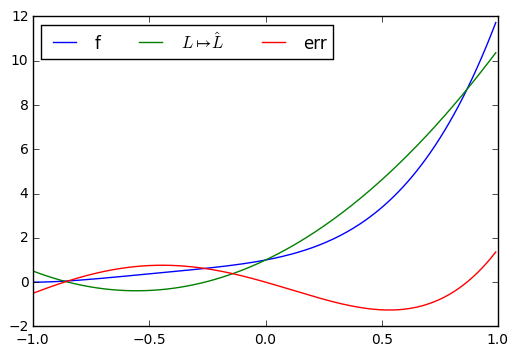

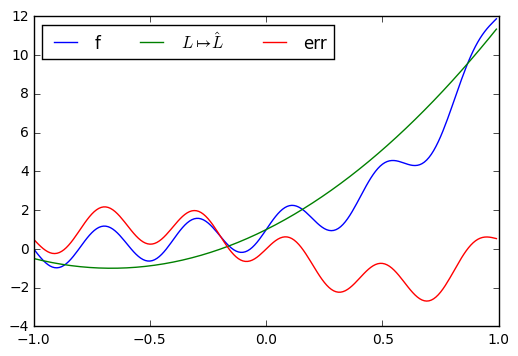

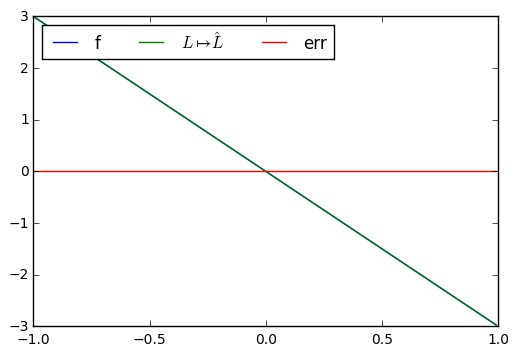

In [20]:
x = np.arange(-1, 1, 1/100)
for f in [f1, f2, f_small]:
    y = map(f, x)
    plt.plot(x, y, label='f')
    # samples = Lagrange interpolation coefficients
    samples = map(f, cheb_points_small)
    # transform Lagrange to Legendre
    c = np.dot(T, samples)
    # evaluate Legendre representation with basis B and coefficients c in x
    Ly = evaluate_function_representation(x, B, N, c)
    plt.plot(x, Ly, label='$L\mapsto\hat{L}$')
    plt.plot(x, y - Ly, label='err')
    plt.legend(ncol=3, loc=2)
    plt.show()

Just for illustration: Transform Lagrange basis into Legendre representation.

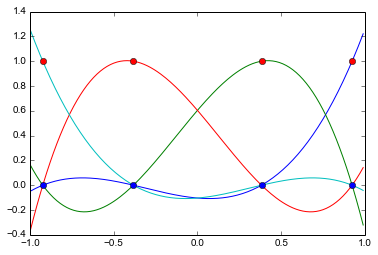

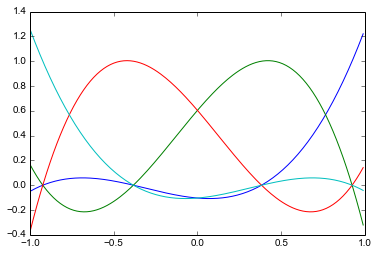

In [28]:
# get Legendre basis
cp = get_cheb_points([4])[0]
T, B, N = lagrange_to_legendre(cp)

# get Legendre coefficients for each Lagrange basis
c = [np.dot(T, ei) for ei in np.identity(len(cp))]

# plot Legendre representation of Lagrange basis
Ley = [evaluate_function_representation(x, B, N, ci) for ci in c]
for ly in Ley:
    plt.plot(x, ly)
# mark interpolation points
plt.plot(cp, [1]*len(cp), 'ro')
plt.plot(cp, [0]*len(cp), 'bo')
plt.show()

# also plot Lagrange basis directly (overlaps with Legendre)
Lay = [evaluate_lagrange(x, cp, j) for j in range(len(cp))]
for ly in Lay:
    plt.plot(x, ly)

[1.0, 0.25, -0.6629126073623882]
0.398942280401


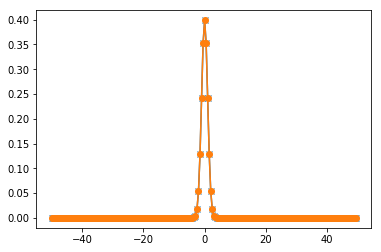

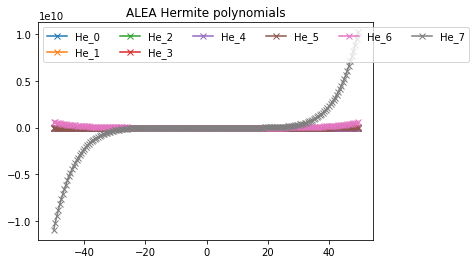

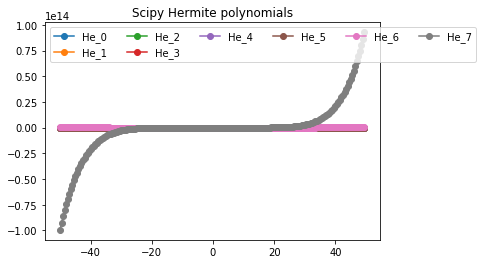

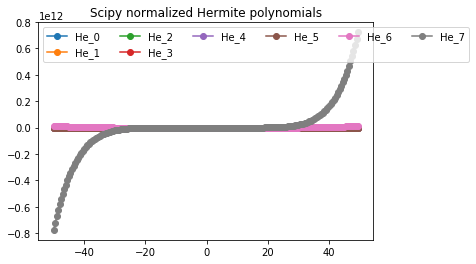

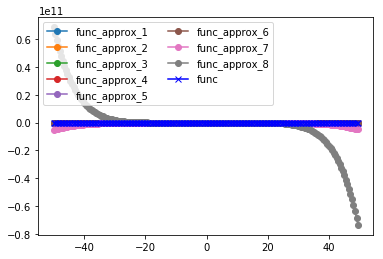

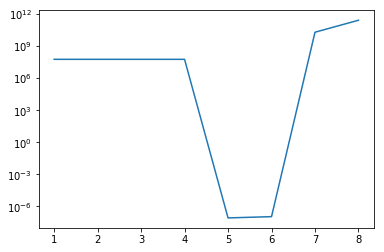

In [66]:
mu = 0
sigma = 1
n_coef = 8
rv = NormalRV(mu, sigma)
M = np.zeros((n_coef, n_coef))
print("norm of the hermite polynomials:")
for lia in range(n_coef):
    for lic in range(n_coef):
       M[lic,lia] =  quad(lambda x: rv.orth_polys.eval(lia, x, False)*rv.orth_polys.eval(lic, x, False)*rv.pdf(x), -np.inf, np.inf)[0]
print M

norm of the hermite polynomials:
[[  1.00000000e+00   0.00000000e+00   5.82867088e-16   0.00000000e+00
    9.15933995e-16   0.00000000e+00   4.33680869e-17   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+00   0.00000000e+00   1.88737914e-15
    0.00000000e+00   4.16333634e-17   0.00000000e+00  -4.87804241e-15]
 [  5.82867088e-16   0.00000000e+00   1.00000000e+00   0.00000000e+00
    1.21375812e-44   0.00000000e+00   4.16333634e-17   0.00000000e+00]
 [  0.00000000e+00   1.88737914e-15   0.00000000e+00   1.00000000e+00
    0.00000000e+00   6.93239823e-43   0.00000000e+00  -1.11022302e-16]
 [  9.15933995e-16   0.00000000e+00   1.21375812e-44   0.00000000e+00
    1.00000000e+00   0.00000000e+00  -6.74398259e-17   0.00000000e+00]
 [  0.00000000e+00   4.16333634e-17   0.00000000e+00   6.93239823e-43
    0.00000000e+00   1.00000000e+00   0.00000000e+00   8.32667268e-17]
 [  4.33680869e-17   0.00000000e+00   4.16333634e-17   0.00000000e+00
   -6.74398259e-17   0.00000000e+00   1.00000000e+0

In [55]:
from numpy.polynomial.hermite import hermgauss
print(hermgauss(4))

(array([-1.65068012, -0.52464762,  0.52464762,  1.65068012]), array([ 0.08131284,  0.80491409,  0.80491409,  0.08131284]))


1.0
1.7966518407470784e-08


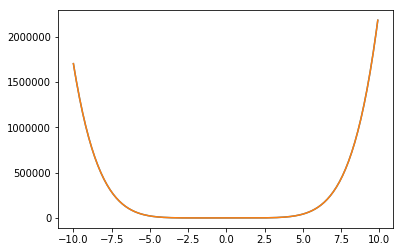

In [63]:
from numpy.polynomial.hermite_e import hermegauss
from numpy.polynomial.hermite_e import hermeval
import os
os.chdir("/home/marschall/WIAS/alea-testing/src/")
from alea.polyquad.polynomials import (StochasticHermitePolynomials, LegendrePolynomials)
from functools import partial

poly = StochasticHermitePolynomials(normalised=True)
poly_eval = partial(poly.eval, all_degrees=False)

f = lambda x: np.polyval([2, 3, 1, 6, 3, 4, 2], x)
x = np.arange(-10 ,10 ,0.1)
plt.plot(x, f(x))
# plt.plot(x, 2*x**2 +3*x +1)
f_x = f(x)

degree = 8

nodes, weights = hermegauss(degree)
weights /=  weights.sum()
print weights.sum()
f_k = [sum(weights[lib]*f(nodes[lib])*poly_eval(lia, nodes[lib]) for lib in range(degree)) for lia in range(degree)]
def eval_fh(x):
    return sum([f_k[_lia]*poly_eval(_lia, x) for _lia in range(degree)])
    
plt.plot(x, eval_fh(x))
fh_x = eval_fh(x)

print np.linalg.norm(f_x - fh_x)